In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)




In [3]:
df.rename(columns={'medv':'Price'},inplace=True)

analysing correlated featres

In [4]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
X=df.drop('Price',axis=1)
y=df['Price']


In [6]:
import seaborn as sns
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

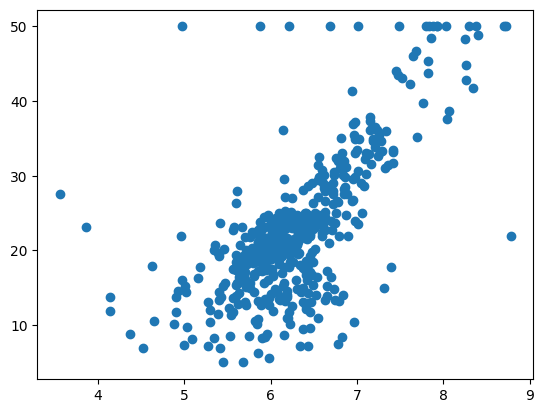

In [7]:
plt.scatter(df['rm'],df['Price'])

<Axes: xlabel='chas', ylabel='Price'>

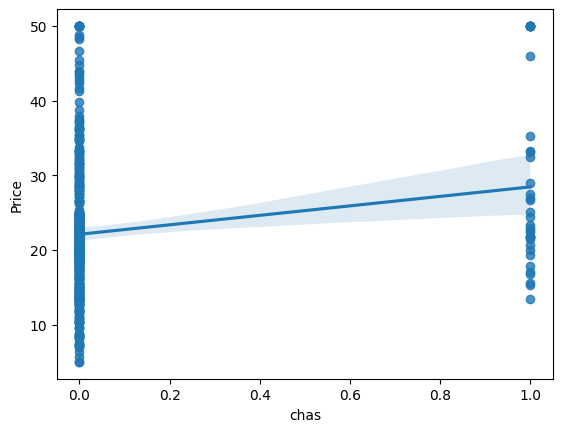

In [8]:
sns.regplot(x='chas',y='Price',data=df)

TRAIN TEST SPLIT

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

STANDARDIZATION

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


TRAIN MODEL

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
# print coeff and intercept
print(lr.coef_)


[-0.72908866  1.04361988  0.14023409  0.9438107  -2.01828655  2.18918023
  0.33463674 -2.90739989  2.31811051 -1.77438087 -2.05753069  0.55874469
 -4.13047566]


In [13]:
print(lr.intercept_)

21.976836158192093


In [14]:
# on which pararmeters model has been trained
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [15]:
prediction=lr.predict(X_test)

In [16]:
prediction

array([40.11113508, 27.38971873, 16.64700435, 16.98475572, 31.12920137,
       32.17489772, 38.5534506 ,  8.16734819, 33.48547457,  7.21877263,
       30.45404514, 13.44085219, 16.25354375, 17.34359227, 25.1543491 ,
       20.44171457,  7.30340549, 33.13892161, 28.41293108, 24.58522513,
       12.44673568, 20.25489284, 22.48601345, 24.42119495, 33.92740928,
       18.63104614, 32.32820984, 18.67352155, 27.36115374, 34.46174375,
       19.84089751, 18.40373436, 37.15821555, 44.94610923, 30.27513579,
       22.00760066, 16.0127978 , 18.16328402,  4.33298095, 30.93867591,
       24.15262229, 17.17277775, 34.10334259, 13.89433899, 17.46893797,
       25.30893285, 30.35309561, 16.10339452, 26.91513852, 22.98227547,
       32.14815603, 37.34454946, 22.90074019, 17.56894548, 30.18430234,
        0.10360753, 20.22573888, 16.82248142, 23.15487984, 21.16760077,
       30.5734497 ,  3.15502223, 15.92340596, 20.06361892, 10.43608925,
       24.28745773, 24.00445196, 19.86245393, 17.63614975, 19.44

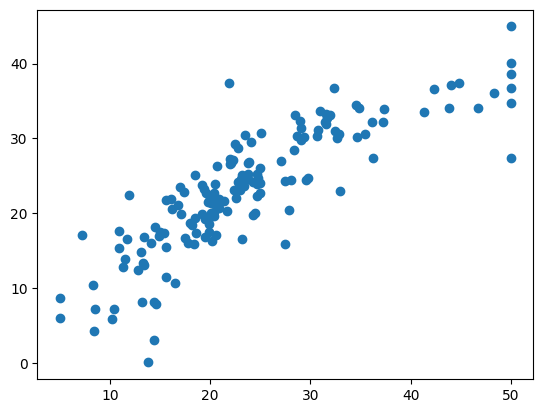

In [17]:
plt.scatter(y_test,prediction)

In [18]:
residuals=y_test-prediction

In [19]:
residuals

,Price
195,9.888865
4,8.810281
434,-4.947004
458,-2.084756
39,-0.329201
...,...
213,3.578934
269,-5.646217
278,-0.734238
17,0.801018


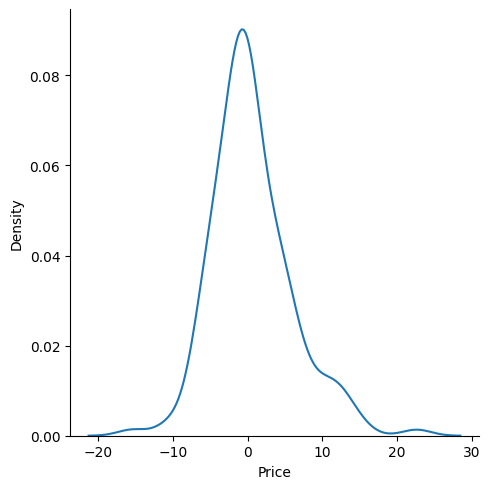

In [20]:
sns.displot(residuals,kind="kde")

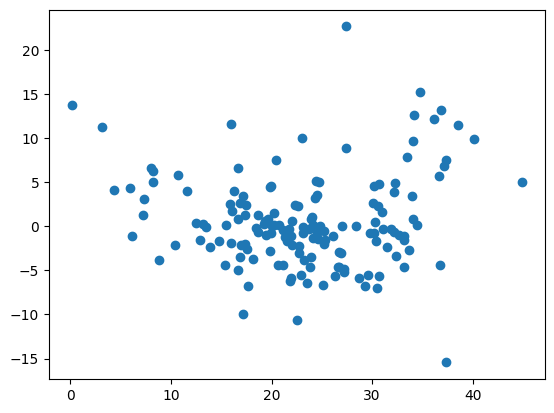

In [21]:
# Scatter plot wrt to pred and residuals
plt.scatter(prediction,residuals)

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_absolute_error(y_test,prediction))
print(mean_squared_error(y_test,prediction))
print(np.sqrt(mean_squared_error(y_test,prediction)))

3.8356963614189366
28.54758527146814
5.34299403625609


In [23]:
# calculating r2 square
from sklearn.metrics import r2_score

score=r2_score(y_test,prediction)
adjusted_r2=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
score

0.7123963332666872

In [24]:
adjusted_r2


0.6853032342265925

NEW DATA PRED

In [43]:
new_data=df.iloc[0]
new_data

,0
crim,0.00632
zn,18.00000
indus,2.31000
chas,0.00000
nox,0.53800
rm,6.57500
age,65.20000
dis,4.09000
rad,1.00000
tax,296.00000


In [47]:
new_data=df.iloc[0,:-1]
new_data=np.array(new_data)
new_data=new_data.reshape(1,-1)
new_data=scaler.transform(new_data)
new_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.42871257,  0.387364  , -1.33584851, -0.26967994, -0.16781964,
         0.47479144, -0.1717132 ,  0.17122766, -0.99846264, -0.68215017,
        -1.48092232,  0.43799542, -1.16847019]])

In [48]:
result=lr.predict(new_data)

In [49]:
result

array([30.08858732])

SAVE MODEL

In [50]:
import pickle
pickle.dump(lr,open('housePred.pkl','wb'))

In [53]:
pickle_model=pickle.load(open('housePred.pkl','rb'))

In [55]:
pickle_model.predict(new_data)

array([30.08858732])